<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Singapore Housing Data and Kaggle Challenge

### Notebook #2 for Data Visualisation [Individual]

### Aim:
To deepen understanding of the dataset and have a better sense of the correlation between certain features.

### Problem Statement:
Are resale prices of central region HDBs influenced primarily by its location?

In [1]:
# import libraries
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import statsmodels.api as sm

from itertools import cycle, islice
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# read csv file into df
train_csv = '../data/train.csv'
train_df = pd.read_csv(train_csv)

train_df

/var/folders/vz/145gpzx54wn19kkmfg10cxyr0000gn/T/ipykernel_75538/4222967168.py:3: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(train_csv)


,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,...,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,...,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,...,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,...,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,...,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150629,39814,2020-09,WOODLANDS,EXECUTIVE,849,WOODLANDS ST 82,04 TO 06,161.0,Apartment,1995,...,43,0,1.444148,103.794545,189.889876,Evergreen Secondary School,224,0,1.441221,103.793772
150630,147177,2017-06,JURONG WEST,5 ROOM,648D,JURONG WEST ST 61,04 TO 06,110.0,Improved,2001,...,45,0,1.339244,103.698896,614.418470,Boon Lay Secondary School,188,0,1.343224,103.701703
150631,179087,2020-12,BEDOK,EXECUTIVE,639,BEDOK RESERVOIR RD,10 TO 12,144.0,Apartment,1993,...,43,1,1.328471,103.901299,556.889910,Manjusri Secondary School,188,0,1.327520,103.901811
150632,21309,2016-05,QUEENSTOWN,3 ROOM,32,HOLLAND CL,07 TO 09,59.0,Improved,1974,...,82,0,1.299811,103.799965,832.386515,Queensway Secondary School,214,0,1.300475,103.801724


In [3]:
# determine number of planning areas
len(set(train_df['planning_area']))

32

In [4]:
# determine number of sec schs
len(set(train_df['sec_sch_name']))

134

In [5]:
# see all towns
set(train_df['town'])

{'ANG MO KIO',
 'BEDOK',
 'BISHAN',
 'BUKIT BATOK',
 'BUKIT MERAH',
 'BUKIT PANJANG',
 'BUKIT TIMAH',
 'CENTRAL AREA',
 'CHOA CHU KANG',
 'CLEMENTI',
 'GEYLANG',
 'HOUGANG',
 'JURONG EAST',
 'JURONG WEST',
 'KALLANG/WHAMPOA',
 'MARINE PARADE',
 'PASIR RIS',
 'PUNGGOL',
 'QUEENSTOWN',
 'SEMBAWANG',
 'SENGKANG',
 'SERANGOON',
 'TAMPINES',
 'TOA PAYOH',
 'WOODLANDS',
 'YISHUN'}

In [6]:
# see all planning areas
set(train_df['planning_area'])

{'Ang Mo Kio',
 'Bedok',
 'Bishan',
 'Bukit Batok',
 'Bukit Merah',
 'Bukit Panjang',
 'Bukit Timah',
 'Changi',
 'Choa Chu Kang',
 'Clementi',
 'Downtown Core',
 'Geylang',
 'Hougang',
 'Jurong East',
 'Jurong West',
 'Kallang',
 'Marine Parade',
 'Novena',
 'Outram',
 'Pasir Ris',
 'Punggol',
 'Queenstown',
 'Rochor',
 'Sembawang',
 'Sengkang',
 'Serangoon',
 'Tampines',
 'Tanglin',
 'Toa Payoh',
 'Western Water Catchment',
 'Woodlands',
 'Yishun'}

In [7]:
# see all column names
set(train_df.columns)

{'1room_rental',
 '1room_sold',
 '2room_rental',
 '2room_sold',
 '3room_rental',
 '3room_sold',
 '4room_sold',
 '5room_sold',
 'Hawker_Nearest_Distance',
 'Hawker_Within_1km',
 'Hawker_Within_2km',
 'Hawker_Within_500m',
 'Latitude',
 'Longitude',
 'Mall_Nearest_Distance',
 'Mall_Within_1km',
 'Mall_Within_2km',
 'Mall_Within_500m',
 'Tranc_Month',
 'Tranc_Year',
 'Tranc_YearMonth',
 'address',
 'affiliation',
 'block',
 'bus_interchange',
 'bus_stop_latitude',
 'bus_stop_longitude',
 'bus_stop_name',
 'bus_stop_nearest_distance',
 'commercial',
 'cutoff_point',
 'exec_sold',
 'flat_model',
 'flat_type',
 'floor_area_sqft',
 'floor_area_sqm',
 'full_flat_type',
 'hawker_food_stalls',
 'hawker_market_stalls',
 'hdb_age',
 'id',
 'lease_commence_date',
 'lower',
 'market_hawker',
 'max_floor_lvl',
 'mid',
 'mid_storey',
 'mrt_interchange',
 'mrt_latitude',
 'mrt_longitude',
 'mrt_name',
 'mrt_nearest_distance',
 'multigen_sold',
 'multistorey_carpark',
 'other_room_rental',
 'planning_ar

In [8]:
# numeric df, 16 features, 1 target variable
numeric_hdb_train = train_df.filter(['floor_area_sqm',
                                     'resale_price', # target variable
                                     'floor_area_sqft',
                                     'price_per_sqft',
                                     'hdb_age',
                                     'max_floor_lvl',
                                     'total_dwelling_units',
                                     'Mall_Nearest_Distance',
                                     'Hawker_Nearest_Distance',
                                     'hawker_food_stalls',
                                     'hawker_market_stalls',
                                     'mrt_nearest_distance',
                                     'bus_interchange',
                                     'mrt_interchange',
                                     'bus_stop_nearest_distance',
                                     'pri_sch_nearest_distance',
                                     'sec_sch_nearest_dist'
                                     ], axis=1)

numeric_hdb_train.head()

,floor_area_sqm,resale_price,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,total_dwelling_units,Mall_Nearest_Distance,Hawker_Nearest_Distance,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_interchange,mrt_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist
0,90.0,680000.0,968.760,701.928238,15,25,142,1094.090418,154.753357,84,60,330.083069,0,0,29.427395,1138.633422,1138.633422
1,130.0,665000.0,1399.320,475.230826,34,9,112,866.941448,640.151925,80,77,903.659703,1,1,58.207761,415.607357,447.894399
2,144.0,838000.0,1550.016,540.639580,24,16,90,1459.579948,1762.082341,84,95,1334.251197,1,0,214.747860,498.849039,180.074558
3,103.0,550000.0,1108.692,496.080066,29,11,75,950.175199,726.215262,32,86,907.453484,1,1,43.396521,389.515528,389.515528
4,83.0,298000.0,893.412,333.552717,34,4,48,729.771895,1540.151439,45,0,412.343032,0,0,129.422752,401.200584,312.025435


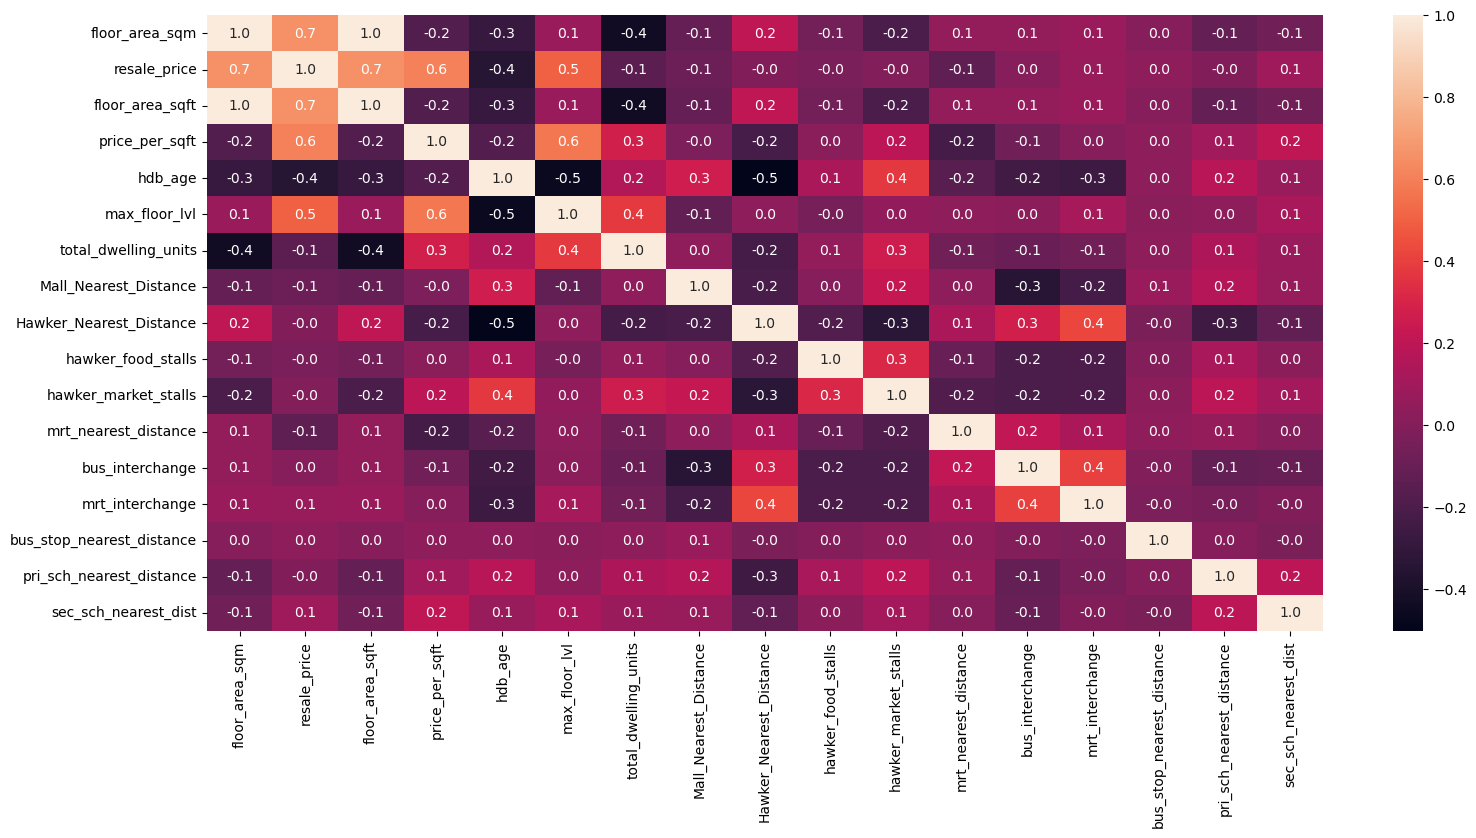

In [9]:
# generate heatmap of all numeric features to see correlation with resale_price
hdb_correlations = numeric_hdb_train.corr();
plt.figure(figsize = (18,8))
sns.heatmap(hdb_correlations, annot=True, fmt=".1f");

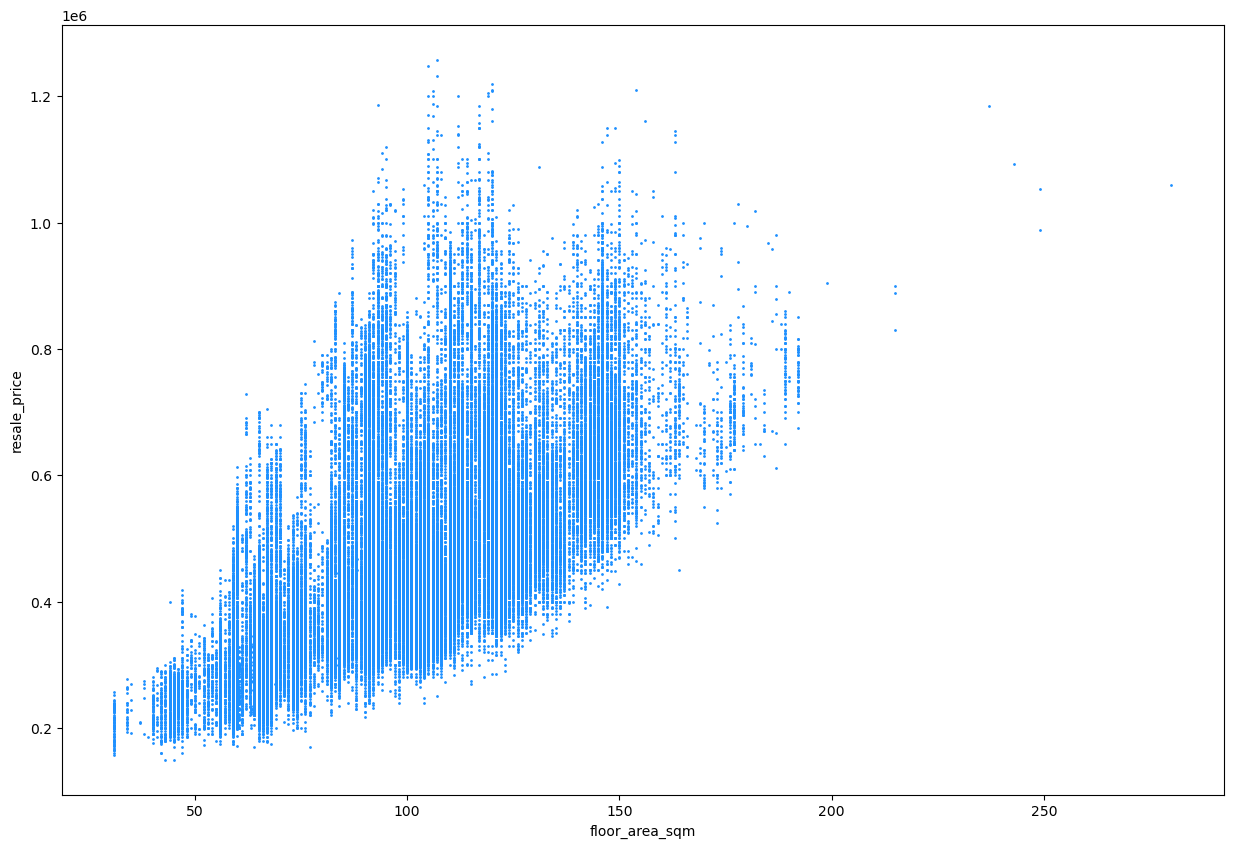

In [10]:
# initial data viz, resale_price vs. floor_area_sqm
numeric_hdb_train.plot(x='floor_area_sqm', y='resale_price', kind='scatter', 
                       color='dodgerblue', figsize=(15,10), s=1);

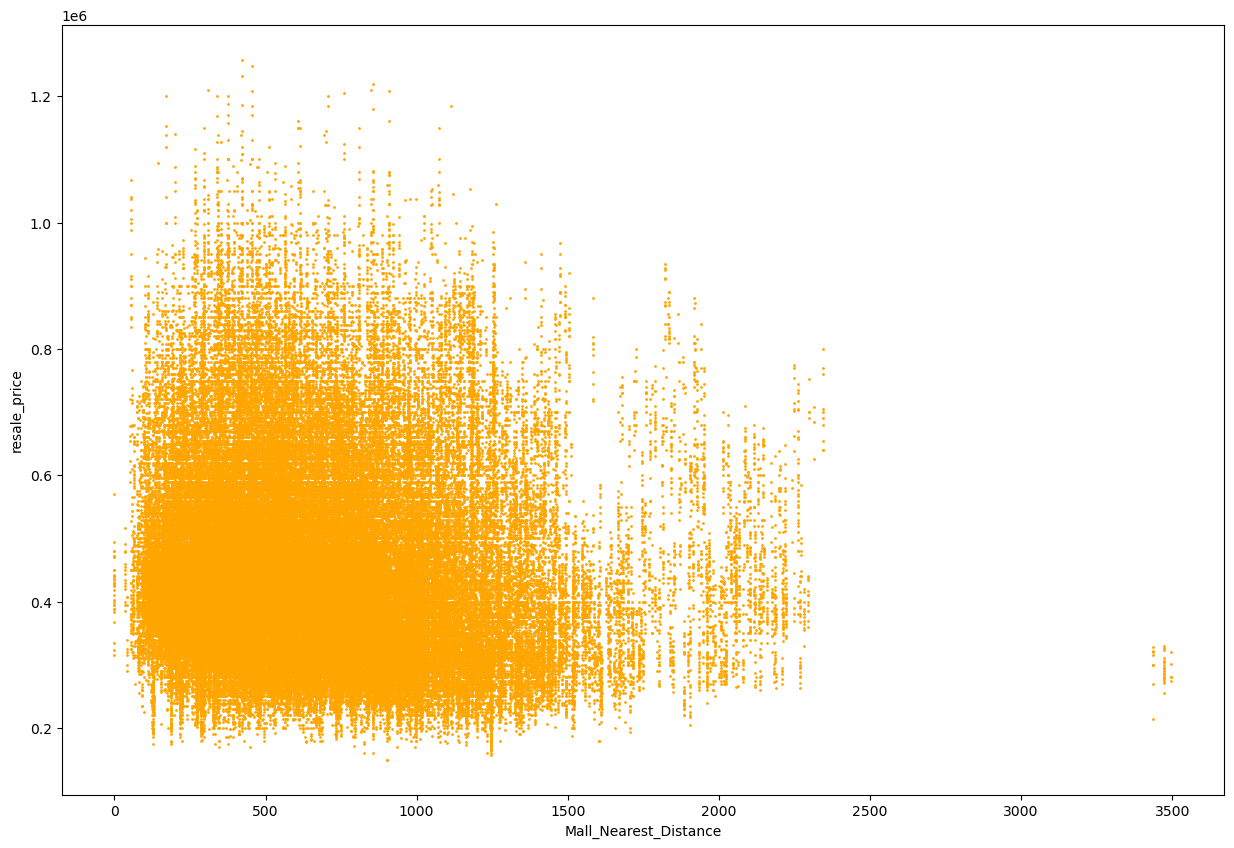

In [11]:
# initial data viz, resale_price vs. Mall_Nearest_Distance
numeric_hdb_train.plot(x='Mall_Nearest_Distance', y='resale_price', kind='scatter', 
                       color='orange', figsize=(15,10), s=1);

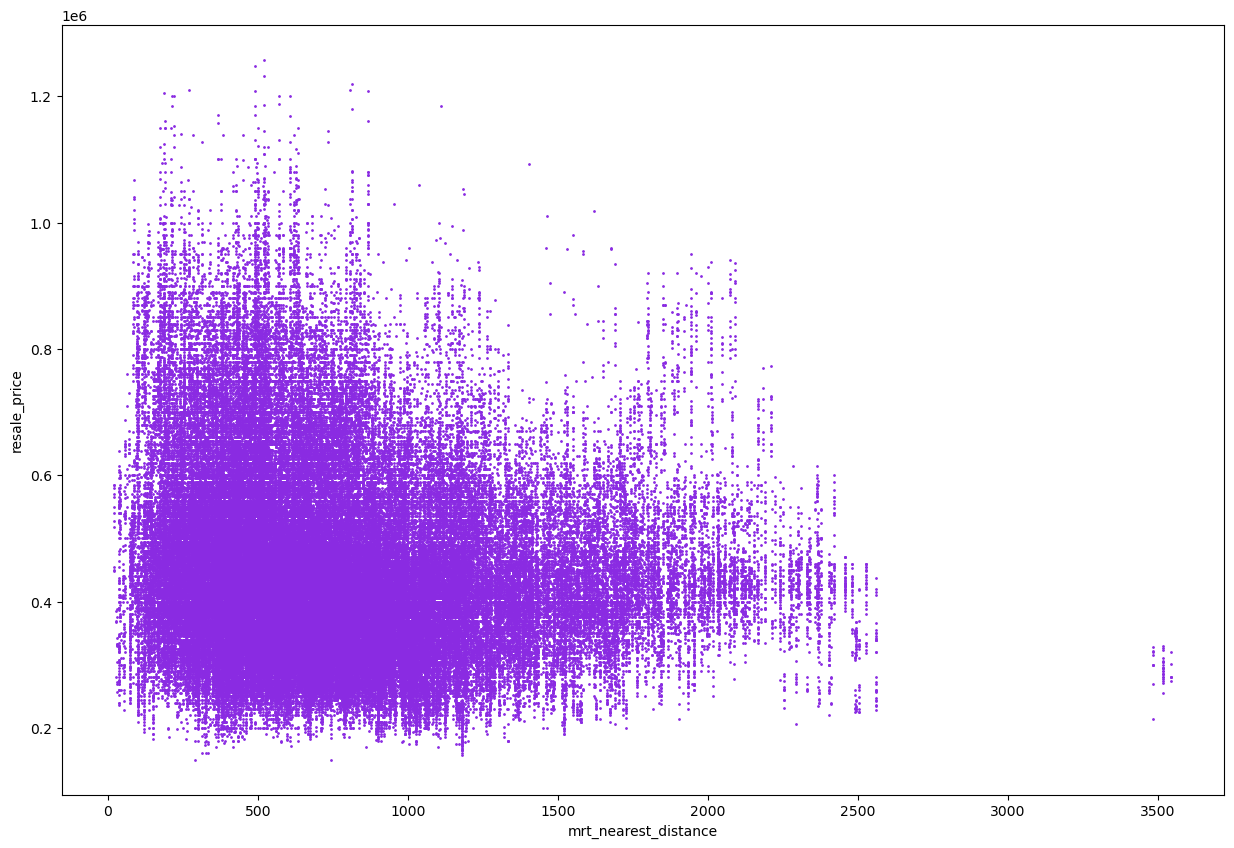

In [12]:
# initial data viz, resale_price vs. mrt_nearest_distance
numeric_hdb_train.plot(x='mrt_nearest_distance', y='resale_price', kind='scatter', 
                       color='blueviolet', figsize=(15,10), s=1);

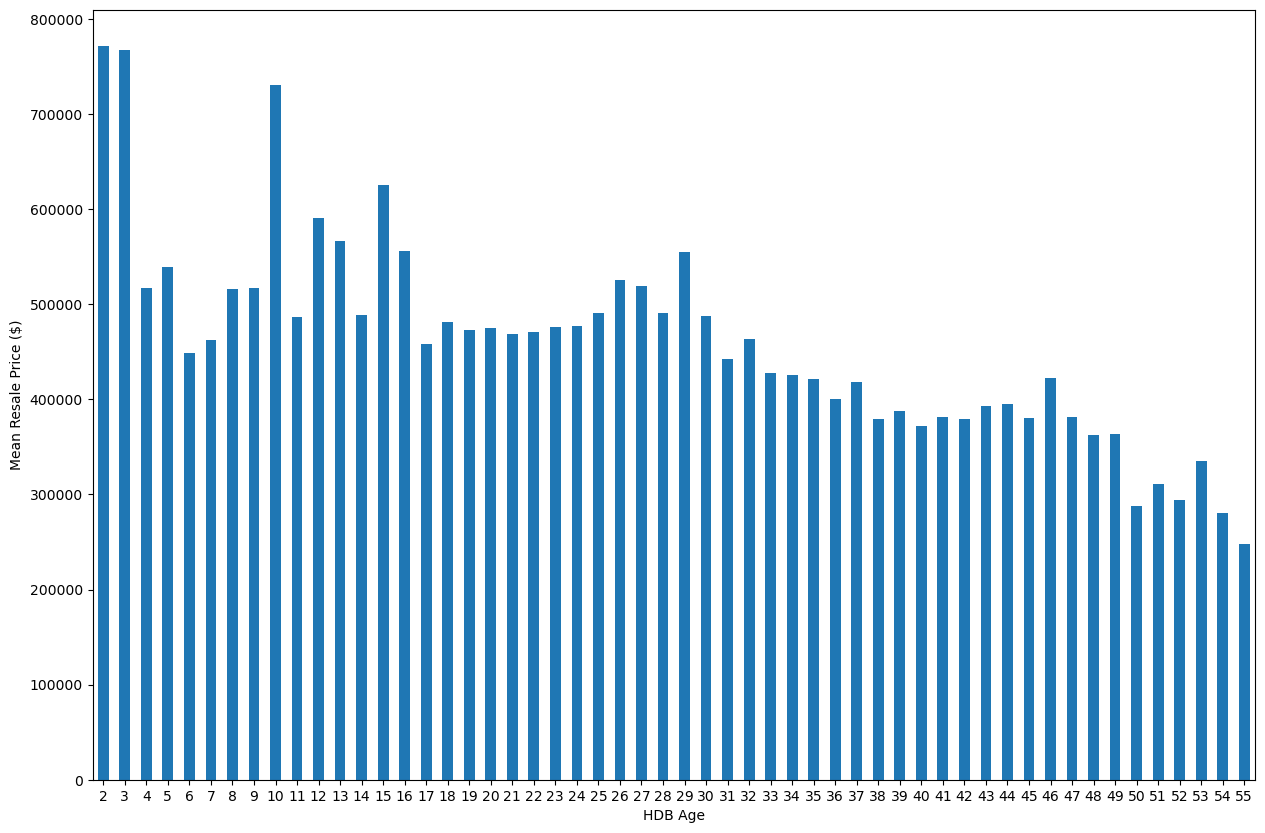

In [13]:
# initial data viz, mean resale_price vs. hdb_age
numeric_hdb_train.groupby('hdb_age')['resale_price'].mean().plot(kind='bar',rot=0, figsize=(15, 10))
plt.xlabel('HDB Age');
plt.ylabel('Mean Resale Price ($)');

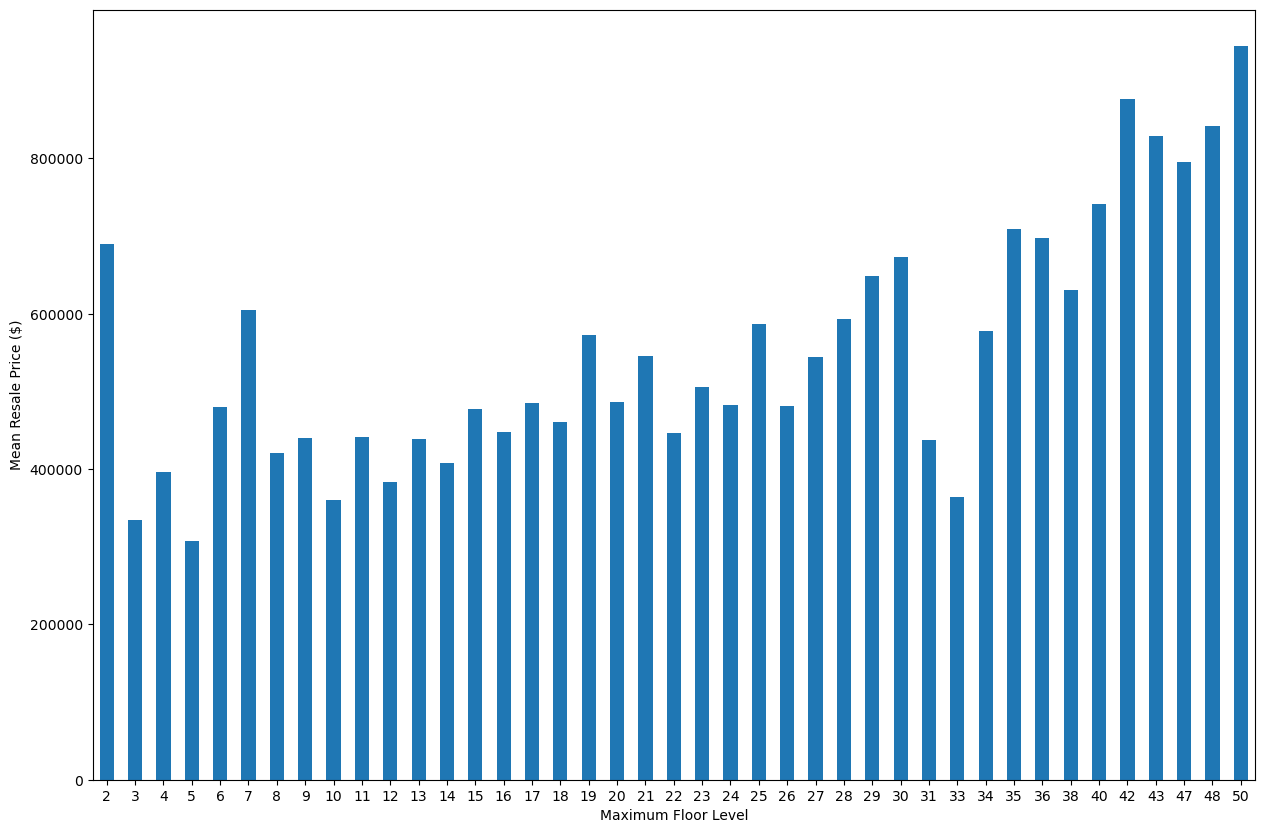

In [14]:
# initial data viz, mean resale_price vs. max_floor_lvl
numeric_hdb_train.groupby('max_floor_lvl')['resale_price'].mean().plot(kind='bar',rot=0, figsize=(15, 10))
plt.xlabel('Maximum Floor Level');
plt.ylabel('Mean Resale Price ($)');

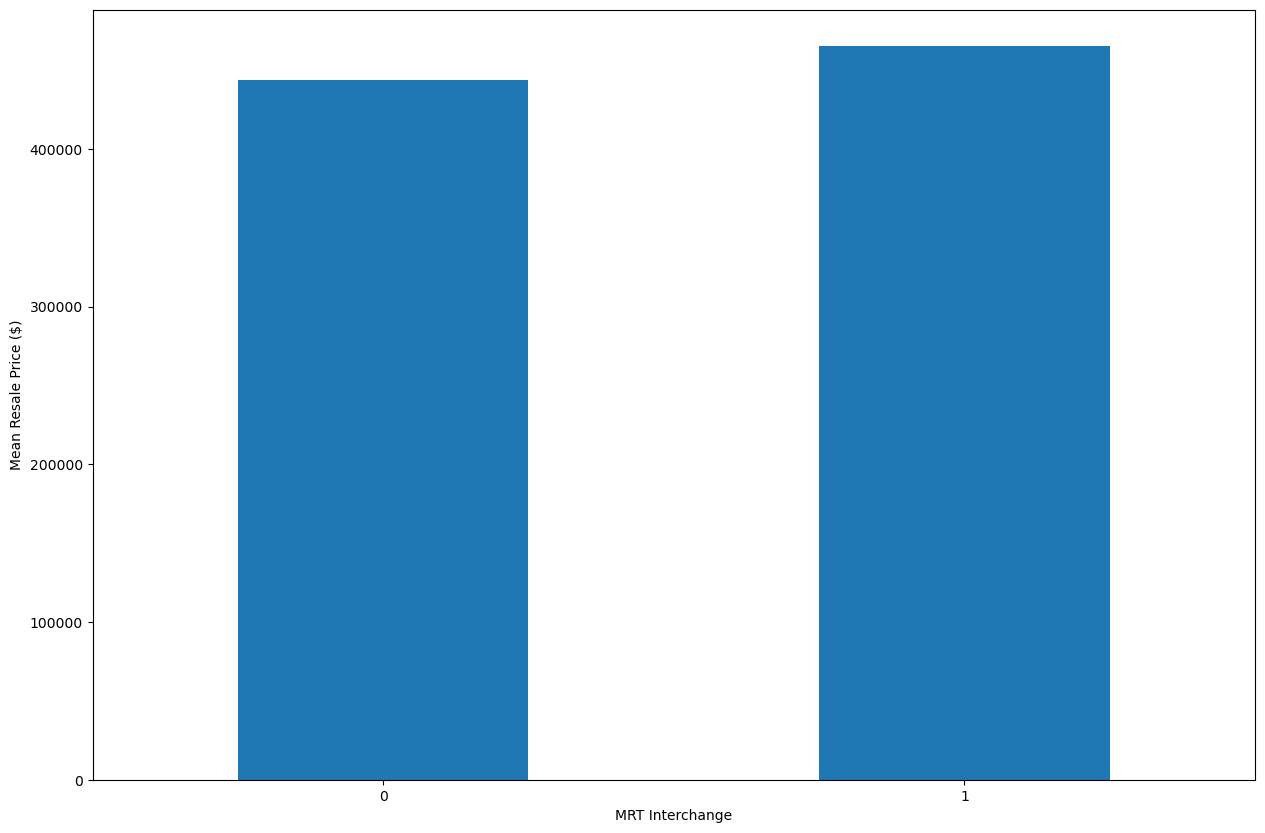

In [15]:
# initial data viz, mean resale_price vs. presence of mrt interchange nearby
numeric_hdb_train.groupby('mrt_interchange')['resale_price'].mean().plot(kind='bar',rot=0, figsize=(15, 10))
plt.xlabel('MRT Interchange');
plt.ylabel('Mean Resale Price ($)');

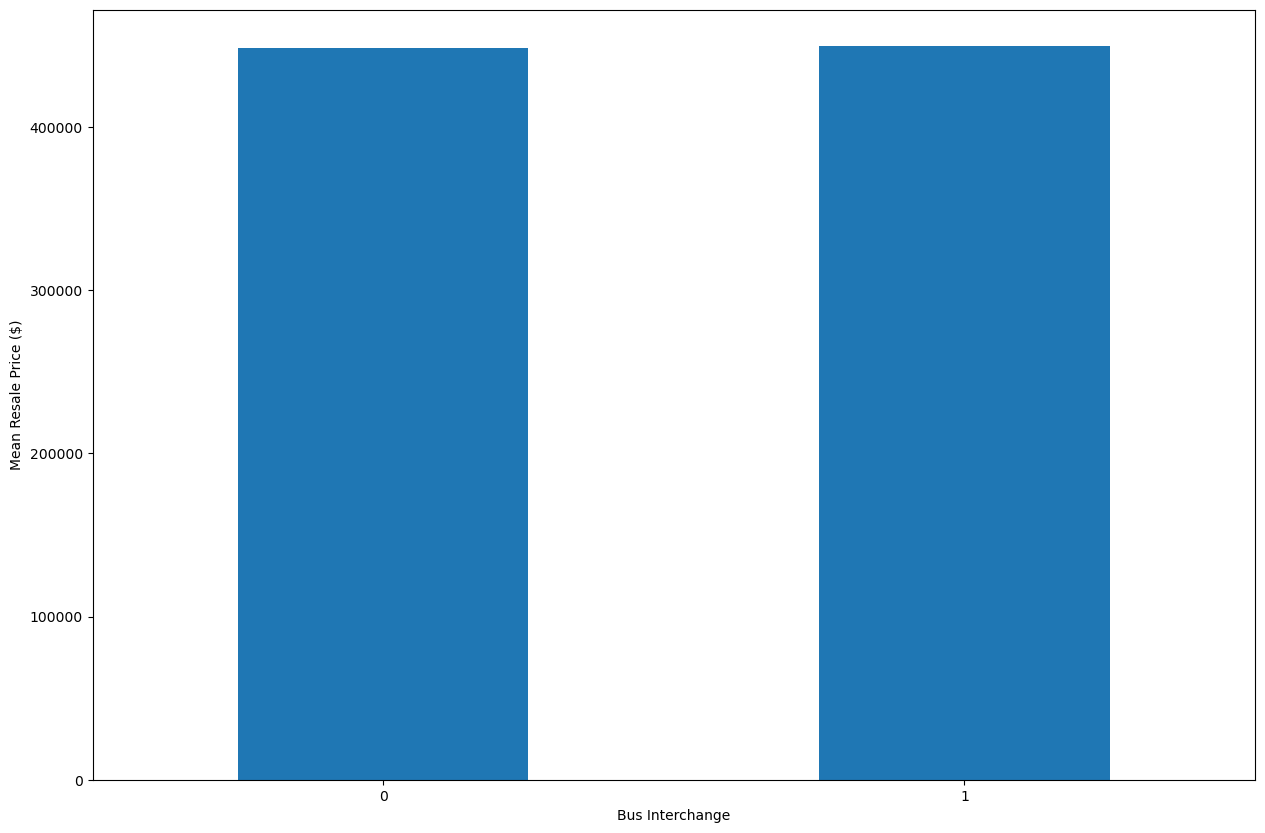

In [16]:
# initial data viz, mean resale_price vs. presence of bus interchange nearby
numeric_hdb_train.groupby('bus_interchange')['resale_price'].mean().plot(kind='bar',rot=0, figsize=(15, 10))
plt.xlabel('Bus Interchange');
plt.ylabel('Mean Resale Price ($)');

In [17]:
# create a list of all planning areaas
all_planning_areas = ['Ang Mo Kio',
 'Bedok',
 'Bishan',
 'Bukit Batok',
 'Bukit Merah',
 'Bukit Panjang',
 'Bukit Timah',
 'Changi',
 'Choa Chu Kang',
 'Clementi',
 'Downtown Core',
 'Geylang',
 'Hougang',
 'Jurong East',
 'Jurong West',
 'Kallang',
 'Marine Parade',
 'Novena',
 'Outram',
 'Pasir Ris',
 'Punggol',
 'Queenstown',
 'Rochor',
 'Sembawang',
 'Sengkang',
 'Serangoon',
 'Tampines',
 'Tanglin',
 'Toa Payoh',
 'Western Water Catchment',
 'Woodlands',
 'Yishun']

# create list of central region towns
# based on URA definition
# https://www.ura.gov.sg/-/media/Corporate/Property/REALIS/realis-maps/map_cr_by_fa_ca.pdf
cr = ['Bishan','Bukit Merah','Bukit Timah','Downtown Core','Geylang','Kallang','Marine Parade','Novena',
      'Outram','Queenstown','Rochor','Tanglin','Toa Payoh']

# create list of outside central region towns
# based on URA definition
# https://www.ura.gov.sg/-/media/Corporate/Property/REALIS/realis-maps/map_cr_by_fa_ca.pdf
ocr = ['Ang Mo Kio', 'Bedok','Bukit Batok','Bukit Panjang', 'Changi', 'Choa Chu Kang',
       'Clementi','Hougang','Jurong East','Jurong West','Pasir Ris','Punggol','Sembawang',
       'Sengkang','Serangoon','Tampines','Western Water Catchment','Woodlands','Yishun']

# create list of bordering central region towns
# based on URA definition
# https://www.ura.gov.sg/-/media/Corporate/Property/REALIS/realis-maps/map_cr_by_fa_ca.pdf
bcr = ['Ang Mo Kio', 'Bedok','Bukit Batok', 'Bukit Panjang',
       'Clementi','Hougang','Serangoon']

In [18]:
# add a column to determine if listing is in central or not
train_df['central'] = train_df['planning_area'].map(lambda x: 1 if x in cr else 0)

train_df

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude,central
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,...,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504,1
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,...,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892,1
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,...,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013,0
3,86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,...,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934,1
4,153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,...,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150629,39814,2020-09,WOODLANDS,EXECUTIVE,849,WOODLANDS ST 82,04 TO 06,161.0,Apartment,1995,...,0,1.444148,103.794545,189.889876,Evergreen Secondary School,224,0,1.441221,103.793772,0
150630,147177,2017-06,JURONG WEST,5 ROOM,648D,JURONG WEST ST 61,04 TO 06,110.0,Improved,2001,...,0,1.339244,103.698896,614.418470,Boon Lay Secondary School,188,0,1.343224,103.701703,0
150631,179087,2020-12,BEDOK,EXECUTIVE,639,BEDOK RESERVOIR RD,10 TO 12,144.0,Apartment,1993,...,1,1.328471,103.901299,556.889910,Manjusri Secondary School,188,0,1.327520,103.901811,0
150632,21309,2016-05,QUEENSTOWN,3 ROOM,32,HOLLAND CL,07 TO 09,59.0,Improved,1974,...,0,1.299811,103.799965,832.386515,Queensway Secondary School,214,0,1.300475,103.801724,1


In [19]:
all_towns = ['ANG MO KIO',
 'BEDOK',
 'BISHAN',
 'BUKIT BATOK',
 'BUKIT MERAH',
 'BUKIT PANJANG',
 'BUKIT TIMAH',
 'CENTRAL AREA',
 'CHOA CHU KANG',
 'CLEMENTI',
 'GEYLANG',
 'HOUGANG',
 'JURONG EAST',
 'JURONG WEST',
 'KALLANG/WHAMPOA',
 'MARINE PARADE',
 'PASIR RIS',
 'PUNGGOL',
 'QUEENSTOWN',
 'SEMBAWANG',
 'SENGKANG',
 'SERANGOON',
 'TAMPINES',
 'TOA PAYOH',
 'WOODLANDS',
 'YISHUN'
]

towns_by_price = ['BUKIT TIMAH',
'BISHAN',
'CENTRAL AREA',
'BUKIT MERAH',
'QUEENSTOWN',
'MARINE PARADE',
'PASIR RIS',
'KALLANG/WHAMPOA',
'SERANGOON',
'TOA PAYOH',
'TAMPINES',
'PUNGGOL',
'CLEMENTI',
'SENGKANG',
'HOUGANG',
'BUKIT PANJANG',
'GEYLANG',
'JURONG EAST',
'BEDOK',
'ANG MO KIO',
'CHOA CHU KANG',
'SEMBAWANG',
'JURONG WEST',
'WOODLANDS',
'BUKIT BATOK',
'YISHUN'
]

central_towns = ['BISHAN',
 'BUKIT MERAH',
 'BUKIT TIMAH',
 'CENTRAL AREA',
 'KALLANG/WHAMPOA',
 'MARINE PARADE',
 'QUEENSTOWN',
 'TOA PAYOH']

non_central_towns = ['ANG MO KIO',
 'BEDOK',
 'BUKIT BATOK',
 'BUKIT PANJANG',
 'BUKIT TIMAH',
 'CHOA CHU KANG',
 'CLEMENTI',
 'GEYLANG',
 'HOUGANG',
 'JURONG EAST',
 'JURONG WEST',
 'PASIR RIS',
 'PUNGGOL',
 'SEMBAWANG',
 'SENGKANG',
 'SERANGOON',
 'TAMPINES',
 'WOODLANDS',
 'YISHUN']

border_central_region = ['BEDOK',
   'HOUGANG',
   'SERANGOON',
   'ANG MO KIO',
   'BUKIT BATOK',
   'BUKIT PANJANG',
   'CLEMENTI'
 ]

<Axes: xlabel='central'>

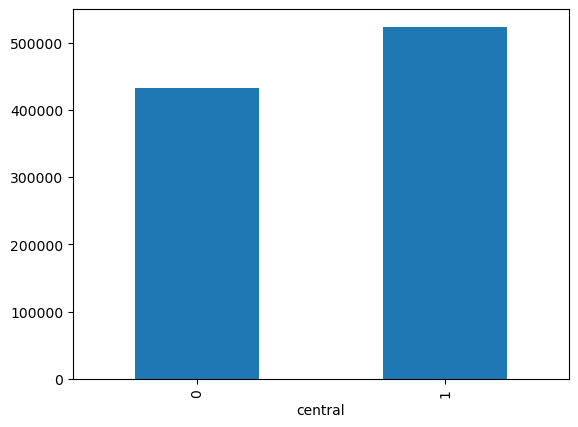

In [20]:
# bar plot of central vs. non-central mean resale price
train_df.groupby('central')['resale_price'].mean().plot(kind='bar')

In [21]:
# mean resale value in each town
train_df.groupby('planning_area')['resale_price'].mean().sort_values(ascending=False)

planning_area
Tanglin                    702600.000000
Bukit Timah                702142.314917
Outram                     692618.972332
Downtown Core              621383.483871
Bishan                     618369.865510
Bukit Merah                555343.708384
Queenstown                 550512.740558
Marine Parade              523842.453871
Kallang                    506686.952223
Pasir Ris                  502847.260317
Serangoon                  487914.267863
Toa Payoh                  475738.827901
Tampines                   474169.612888
Punggol                    469218.233866
Clementi                   466308.240573
Rochor                     459544.247863
Sengkang                   458109.147497
Novena                     442677.053786
Hougang                    441805.646241
Bukit Panjang              436084.447042
Western Water Catchment    434566.666667
Geylang                    429782.144506
Jurong East                425715.546233
Bedok                      419733.077025
An

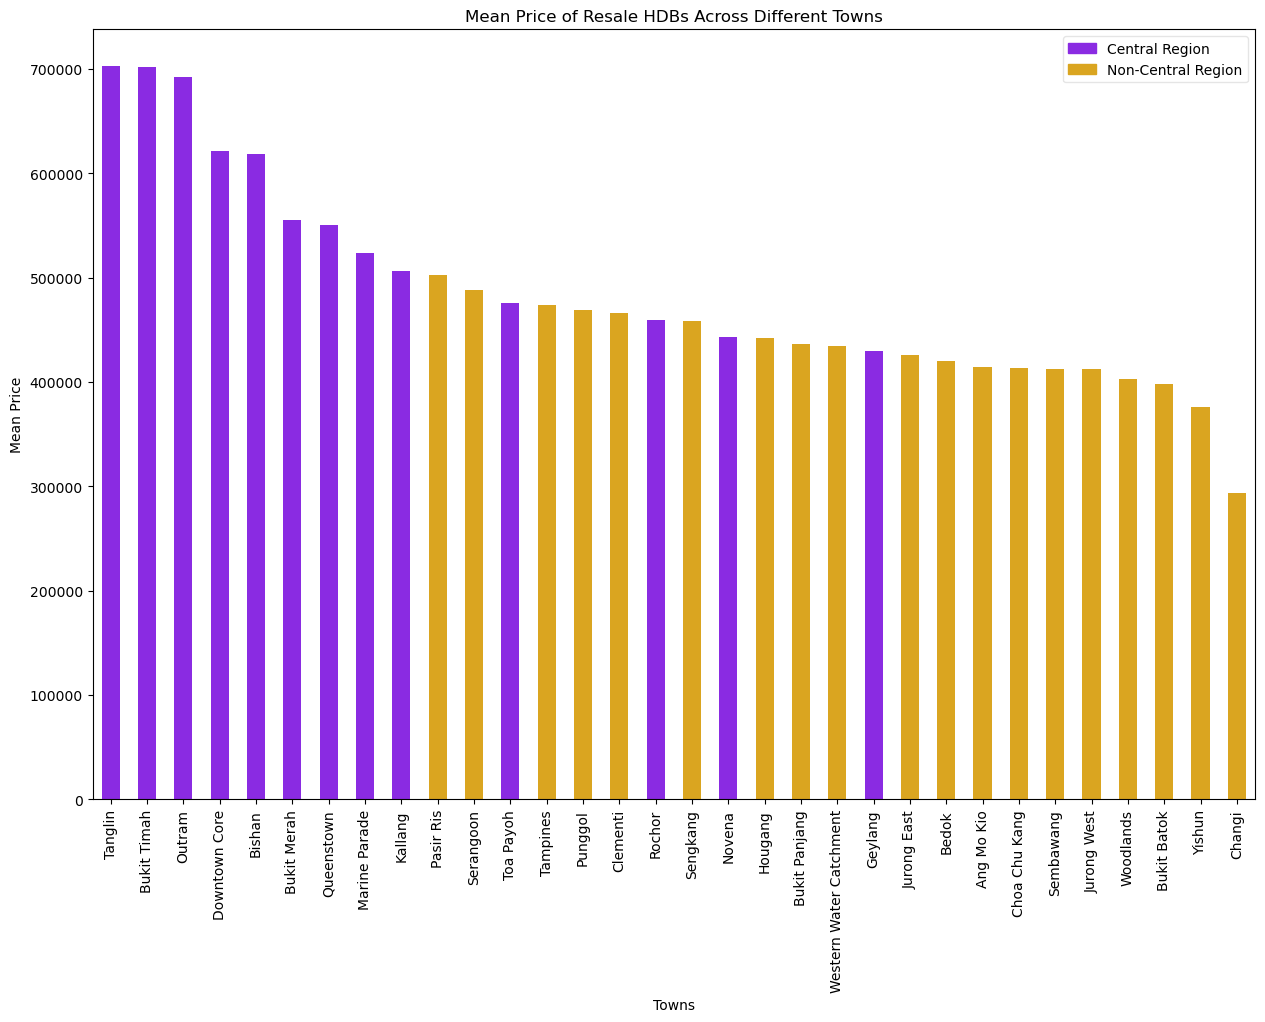

In [22]:
# bar plot of mean resale prices of each town in ascending order
# separate colours for central vs. non-central

planning_areas_by_price = [
    'Tanglin',
    'Bukit Timah',
    'Outram',
    'Downtown Core',
    'Bishan',
    'Bukit Merah',
    'Queenstown',
    'Marine Parade',
    'Kallang',
    'Pasir Ris',
    'Serangoon',
    'Toa Payoh',
    'Tampines',
    'Punggol',
    'Clementi',
    'Rochor',
    'Sengkang',
    'Novena',
    'Hougang',
    'Bukit Panjang',
    'Western Water Catchment',
    'Geylang',
    'Jurong East',
    'Bedok',
    'Ang Mo Kio',
    'Choa Chu Kang',
    'Sembawang',
    'Jurong West',
    'Woodlands',
    'Bukit Batok',
    'Yishun',
    'Changi'
]

colors = ["blueviolet" if i in cr else "goldenrod" for i in planning_areas_by_price]

ax1 = train_df.groupby('planning_area')['resale_price'].mean().sort_values(ascending=False).plot(kind='bar',figsize=(15, 10), color=colors)
plt.title('Mean Price of Resale HDBs Across Different Towns')
ax1.set_xlabel("Towns")
ax1.set_ylabel("Mean Price")

# create a custom legend
cr_patch = mpatches.Patch(color='blueviolet', label='Central Region')
ncr_patch = mpatches.Patch(color='goldenrod', label='Non-Central Region')
plt.legend(handles=[cr_patch, ncr_patch], loc='upper right', framealpha=0.5, frameon=True)

Text(0, 0.5, 'Age or Level')

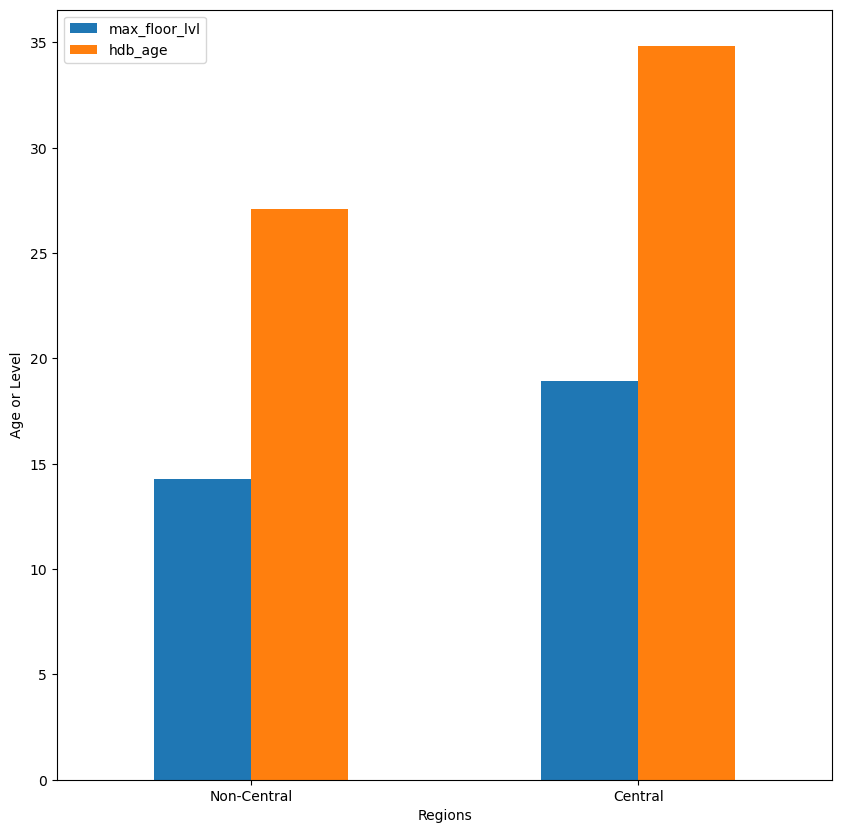

In [23]:
# bar plot of mean max_floor_lvl and hdb_age in central vs. non-central
# not included in presentation

ax2 = train_df.groupby('central')[['max_floor_lvl','hdb_age']].mean().plot(kind='bar',figsize=(10, 10))
# plt.title('title')
ax2.set_xticklabels(["Non-Central", "Central"], rotation=0)
ax2.set_xlabel("Regions")
ax2.set_ylabel("Age or Level")

Text(0.5, 0.98, 'Yearly Mean Price and Transaction Volume of Resale HDBs')

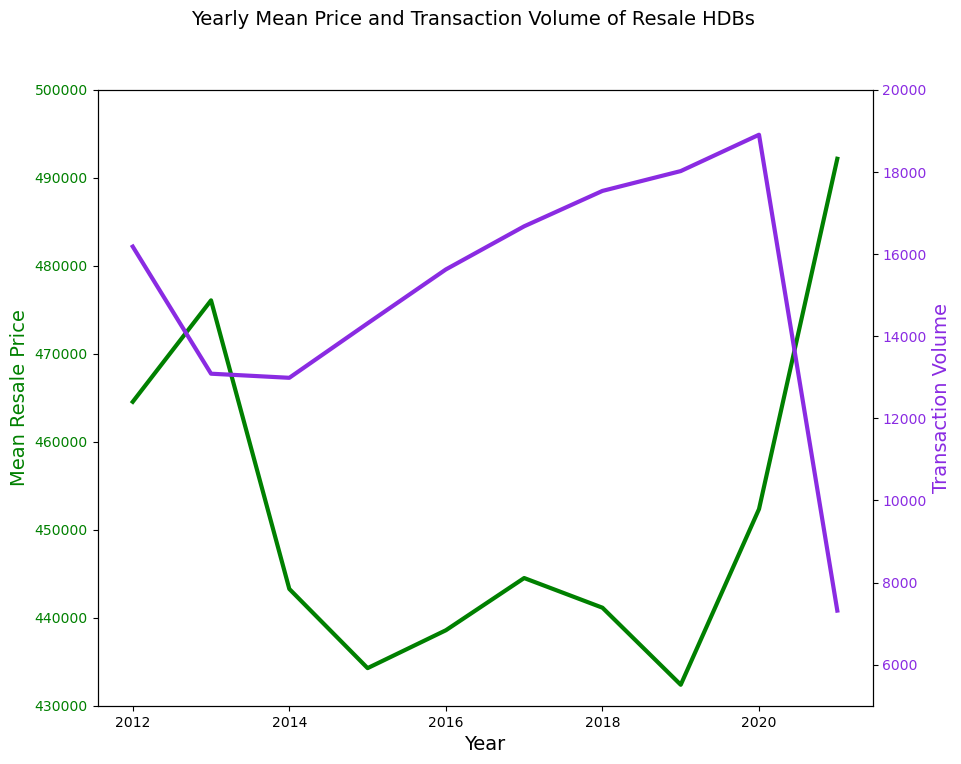

In [24]:
# double vertical axis line plot
# mean resale price / transaction volume from 2012 to 2021
fig, ax3 = plt.subplots(figsize=(10, 8))
ax3.set_ylim(430000, 500000);

# instantiate a second axes that shares the same x-axis
ax4 = ax3.twinx()  
ax4.set_ylim(5000, 20000);

ax3.plot(train_df.groupby('Tranc_Year')['resale_price'].mean(), color='green', lw=3)
ax4.plot(train_df.groupby('Tranc_Year')['id'].count(), color='blueviolet', lw=3)

ax3.set_xlabel("Year", fontsize=14)

ax3.set_ylabel("Mean Resale Price", color='green', fontsize=14)
ax3.tick_params(axis="y", labelcolor='green')

ax4.set_ylabel("Transaction Volume", color='blueviolet', fontsize=14)
ax4.tick_params(axis="y", labelcolor='blueviolet')

fig.suptitle("Yearly Mean Price and Transaction Volume of Resale HDBs", fontsize=14)

In [25]:
# generate list of sec sch in descending order of cutoff point
# to get a sensing of sec sch rankings
# cross-referenced with ranking from: https://www.salary.sg/2021/secondary-schools-ranking-2021-psle-achievement-level-score-cut-off/

train_df[['sec_sch_name','town','cutoff_point']].drop_duplicates().sort_values(by='cutoff_point',ascending=False).head(25)

,sec_sch_name,town,cutoff_point
492,Raffles Girls' School,KALLANG/WHAMPOA,260
88,Raffles Girls' School,CENTRAL AREA,260
184,Methodist Girls' School,BUKIT TIMAH,260
2295,Raffles Institution,BISHAN,257
4281,Raffles Institution,TOA PAYOH,257
16851,Anglo-Chinese School,KALLANG/WHAMPOA,256
442,CHIJ Saint Nicholas Girls' School,ANG MO KIO,256
404,Dunman High School,KALLANG/WHAMPOA,255
690,Cedar Girls' Secondary School,TOA PAYOH,254
3,Catholic High School,BISHAN,253


In [26]:
# list of top sec schs (generally with cutoff point >= 240)
top_sec_schools = ["Raffles Girls' School", "Methodist Girls' School", "Raffles Institution", "Anglo-Chinese School", "CHIJ Saint Nicholas Girls' School", "Dunman High School",
"Cedar Girls' Secondary School", "Catholic High School", "River Valley High School", "Paya Lebar Methodist Girls' School", "Temasek Junior College", "Anderson Secondary School",
"Bukit Panjang Government High School", "Nan Hua High School", "CHIJ Secondary", "Nan Chiau High School", "Chung Cheng High School", "Crescent Girls' School",
"Saint Margaret's Secondary School", "Fairfield Methodist School"]

# list of top sec schs in central region
top_sec_schools_central = ["Raffles Girls' School", "Methodist Girls' School", "Raffles Institution", "Anglo-Chinese School", "Dunman High School",
"Cedar Girls' Secondary School", "Catholic High School", "CHIJ Secondary", "Chung Cheng High School", "Crescent Girls' School",
"Saint Margaret's Secondary School", "Fairfield Methodist School"]

# list of top sec schs outside central region
top_sec_schools_outside_central = ["CHIJ Saint Nicholas Girls' School", "River Valley High School", "Paya Lebar Methodist Girls' School", "Temasek Junior College", "Anderson Secondary School",
"Bukit Panjang Government High School", "Nan Hua High School", "Nan Chiau High School", ]

In [27]:
# generate list of schs for colour customisation of bar plot
temp_df = train_df.groupby('sec_sch_name')[['id']].count().sort_values(by='id',ascending=False)
temp_df.to_dict()['id'].keys()

dict_keys(['Bendemeer Secondary School', 'Boon Lay Secondary School', 'Bukit Batok Secondary School', 'Greendale Secondary School', 'Edgefield Secondary School', 'Pei Hwa Secondary School', 'Nan Chiau High School', 'Ping Yi Secondary School', 'Deyi Secondary School', 'Northbrooks Secondary School', 'Punggol Secondary School', 'Meridian Secondary School', 'Admiralty Secondary School', 'Queensway Secondary School', 'Canberra Secondary School', 'Beatty Secondary School', 'Bukit Panjang Government High School', 'Geylang Methodist School', "CHIJ Saint Joseph's Convent", 'Manjusri Secondary School', "CHIJ Saint Theresa's Convent", 'Unity Secondary School', 'Junyuan Secondary School', 'Evergreen Secondary School', 'Greenridge Secondary School', 'Seng Kang Secondary School', 'Pasir Ris Secondary School', 'Yishun Secondary School', 'Yishun Town Secondary School', 'Jurong West Secondary School', 'Outram Secondary School', 'Zhenghua Secondary School', 'Woodlands Ring Secondary School', 'Montfort 

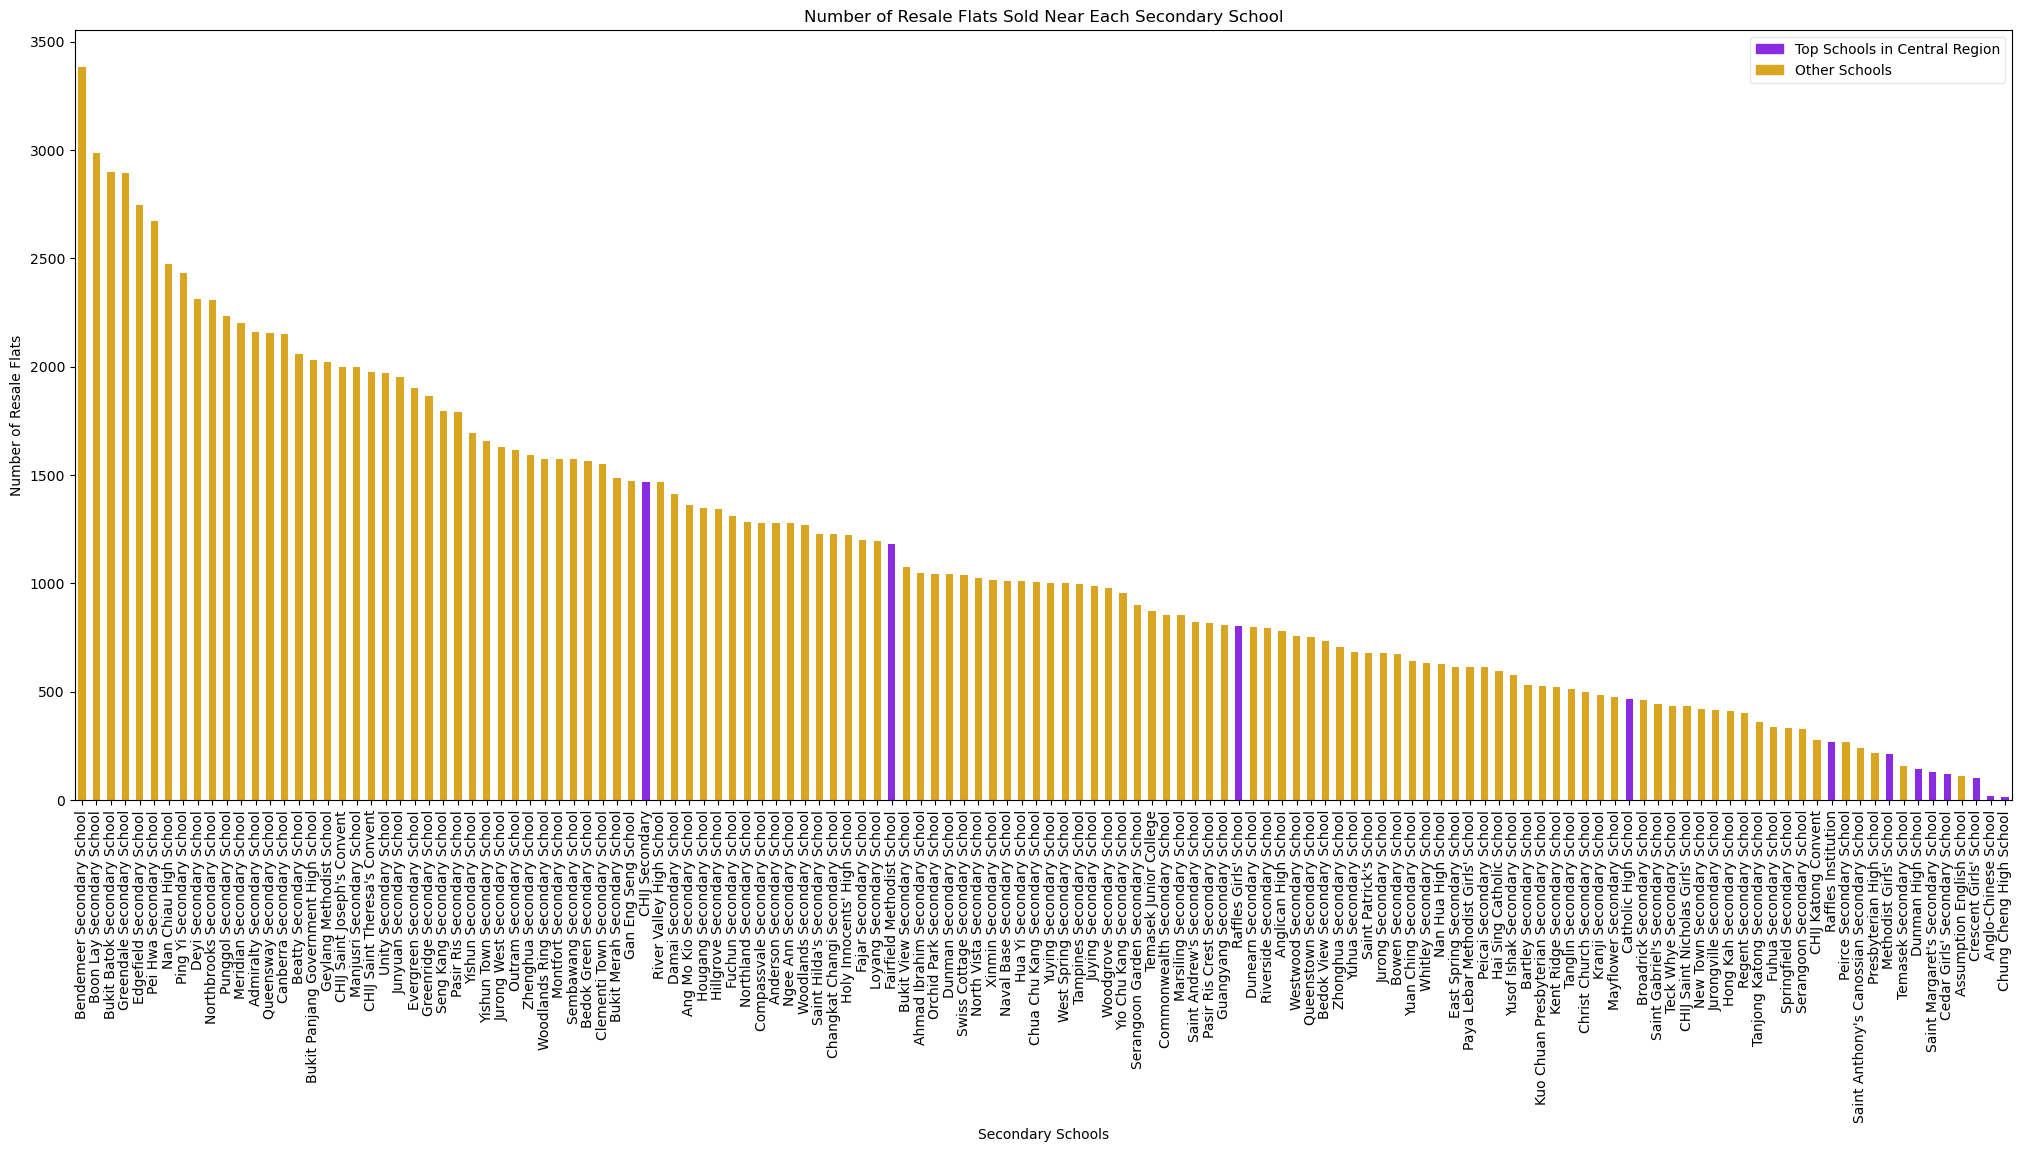

In [28]:
# list of schs for colour customisation of bar plot
sec_sch_by_resale_vol = ['Bendemeer Secondary School', 'Boon Lay Secondary School', 'Bukit Batok Secondary School', 'Greendale Secondary School', 'Edgefield Secondary School',
'Pei Hwa Secondary School', 'Nan Chiau High School', 'Ping Yi Secondary School', 'Deyi Secondary School', 'Northbrooks Secondary School', 'Punggol Secondary School',
'Meridian Secondary School', 'Admiralty Secondary School', 'Queensway Secondary School', 'Canberra Secondary School', 'Beatty Secondary School', 'Bukit Panjang Government High School',
'Geylang Methodist School', "CHIJ Saint Joseph's Convent", 'Manjusri Secondary School', "CHIJ Saint Theresa's Convent", 'Unity Secondary School', 'Junyuan Secondary School', 'Evergreen Secondary School',
'Greenridge Secondary School', 'Seng Kang Secondary School', 'Pasir Ris Secondary School', 'Yishun Secondary School', 'Yishun Town Secondary School', 'Jurong West Secondary School', 'Outram Secondary School',
'Zhenghua Secondary School', 'Woodlands Ring Secondary School', 'Montfort Secondary School', 'Sembawang Secondary School', 'Bedok Green Secondary School', 'Clementi Town Secondary School', 'Bukit Merah Secondary School',
'Gan Eng Seng School', 'CHIJ Secondary', 'River Valley High School', 'Damai Secondary School', 'Ang Mo Kio Secondary School', 'Hougang Secondary School', 'Hillgrove Secondary School', 'Fuchun Secondary School',
'Northland Secondary School', 'Compassvale Secondary School', 'Anderson Secondary School', 'Ngee Ann Secondary School', 'Woodlands Secondary School', "Saint Hilda's Secondary School",
'Changkat Changi Secondary School', "Holy Innocents' High School", 'Fajar Secondary School', 'Loyang Secondary School', 'Fairfield Methodist School', 'Bukit View Secondary School',
'Ahmad Ibrahim Secondary School', 'Orchid Park Secondary School', 'Dunman Secondary School', 'Swiss Cottage Secondary School', 'North Vista Secondary School', 'Xinmin Secondary School',
'Naval Base Secondary School', 'Hua Yi Secondary School', 'Chua Chu Kang Secondary School', 'Yuying Secondary School', 'West Spring Secondary School', 'Tampines Secondary School',
'Juying Secondary School', 'Woodgrove Secondary School', 'Yio Chu Kang Secondary School', 'Serangoon Garden Secondary School', 'Temasek Junior College', 'Commonwealth Secondary School',
'Marsiling Secondary School', "Saint Andrew's Secondary School", 'Pasir Ris Crest Secondary School', 'Guangyang Secondary School', "Raffles Girls' School", 'Dunearn Secondary School',
'Riverside Secondary School', 'Anglican High School', 'Westwood Secondary School', 'Queenstown Secondary School', 'Bedok View Secondary School', 'Zhonghua Secondary School', 'Yuhua Secondary School',
"Saint Patrick's School", 'Jurong Secondary School', 'Bowen Secondary School', 'Yuan Ching Secondary School', 'Whitley Secondary School', 'Nan Hua High School', 'East Spring Secondary School',
"Paya Lebar Methodist Girls' School", 'Peicai Secondary School', 'Hai Sing Catholic School', 'Yusof Ishak Secondary School', 'Bartley Secondary School', 'Kuo Chuan Presbyterian Secondary School',
'Kent Ridge Secondary School', 'Tanglin Secondary School', 'Christ Church Secondary School', 'Kranji Secondary School', 'Mayflower Secondary School', 'Catholic High School', 'Broadrick Secondary School',
"Saint Gabriel's Secondary School", 'Teck Whye Secondary School', "CHIJ Saint Nicholas Girls' School", 'New Town Secondary School', 'Jurongville Secondary School', 'Hong Kah Secondary School', 'Regent Secondary School',
'Tanjong Katong Secondary School', 'Fuhua Secondary School', 'Springfield Secondary School', 'Serangoon Secondary School', 'CHIJ Katong Convent', 'Raffles Institution', 'Peirce Secondary School',
"Saint Anthony's Canossian Secondary School", 'Presbyterian High School', "Methodist Girls' School", 'Temasek Secondary School', 'Dunman High School', "Saint Margaret's Secondary School", "Cedar Girls' Secondary School",
'Assumption English School', "Crescent Girls' School", 'Anglo-Chinese School', 'Chung Cheng High School']

# custom colours for central vs. non-central
colors_2 = ["blueviolet" if i in top_sec_schools_central else "goldenrod" for i in sec_sch_by_resale_vol]

# bar plot sorted in descending order
ax5 = train_df.groupby('sec_sch_name')['id'].count().sort_values(ascending=False).plot(kind='bar',figsize=(25,10), color=colors_2)
plt.title('Number of Resale Flats Sold Near Each Secondary School')
ax5.set_xlabel("Secondary Schools")
ax5.set_ylabel("Number of Resale Flats")

# create a custom legend
cr_patch = mpatches.Patch(color='blueviolet', label='Top Schools in Central Region')
ncr_patch = mpatches.Patch(color='goldenrod', label='Other Schools')
plt.legend(handles=[cr_patch, ncr_patch], loc='upper right', framealpha=0.5, frameon=True)

In [29]:
# generate list of towns for colour customisation of bar plot
temp_df2 = train_df.groupby('planning_area')[['id']].count().sort_values(by='id',ascending=True)
temp_df2.to_dict()['id'].keys()

dict_keys(['Western Water Catchment', 'Tanglin', 'Downtown Core', 'Changi', 'Bukit Timah', 'Rochor', 'Outram', 'Marine Parade', 'Novena', 'Bishan', 'Serangoon', 'Kallang', 'Jurong East', 'Clementi', 'Sembawang', 'Geylang', 'Queenstown', 'Pasir Ris', 'Toa Payoh', 'Bukit Panjang', 'Bukit Batok', 'Bukit Merah', 'Choa Chu Kang', 'Ang Mo Kio', 'Hougang', 'Punggol', 'Bedok', 'Yishun', 'Tampines', 'Sengkang', 'Woodlands', 'Jurong West'])

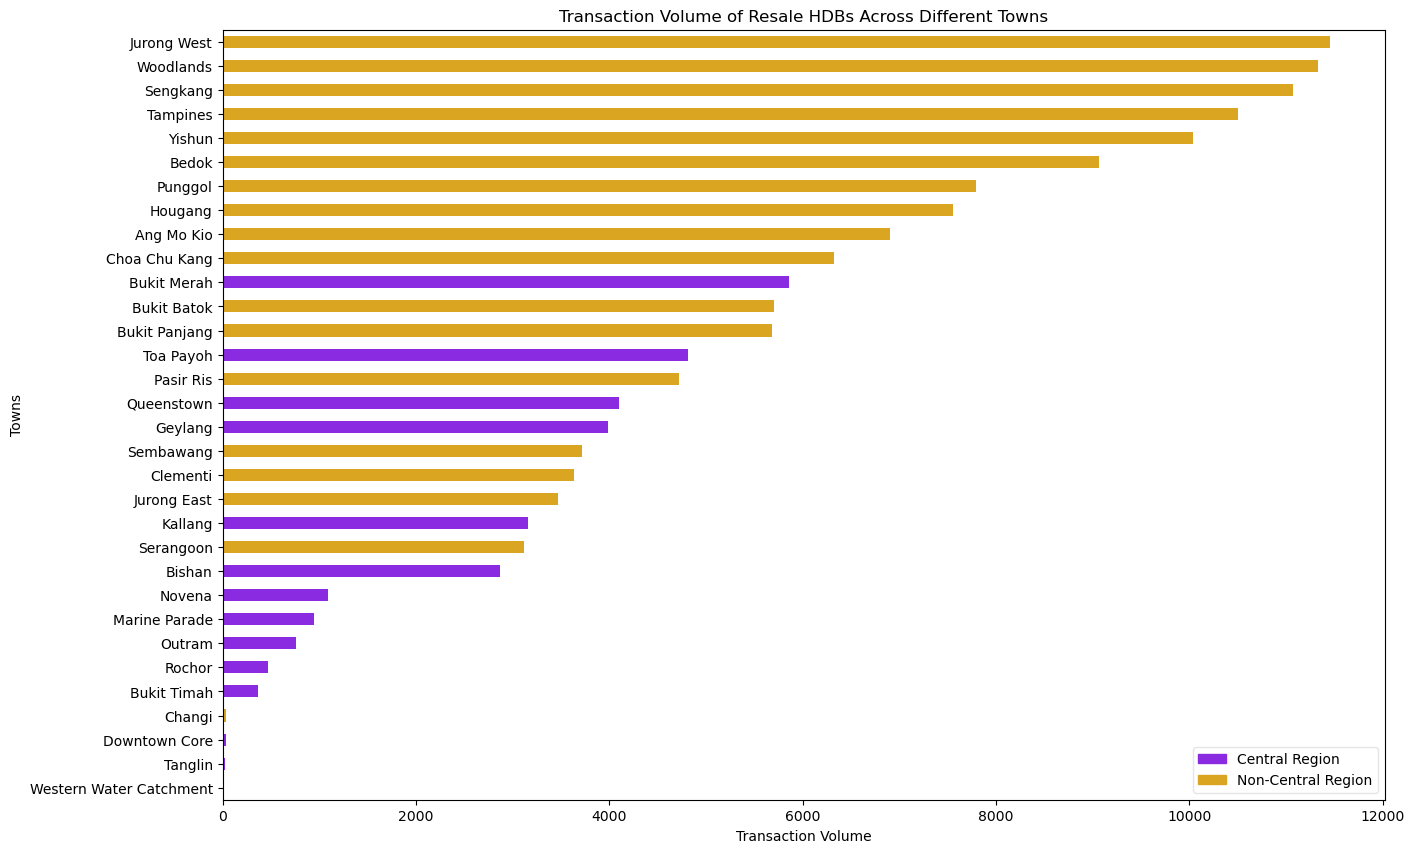

In [30]:
# list of towns for colour customisation of bar plot
planning_areas_by_trans_vol = ['Western Water Catchment', 'Tanglin', 'Downtown Core', 'Changi', 'Bukit Timah', 'Rochor', 'Outram', 'Marine Parade', 'Novena', 'Bishan',
                               'Serangoon', 'Kallang', 'Jurong East', 'Clementi', 'Sembawang', 'Geylang', 'Queenstown', 'Pasir Ris', 'Toa Payoh', 'Bukit Panjang', 'Bukit Batok',
                               'Bukit Merah', 'Choa Chu Kang', 'Ang Mo Kio', 'Hougang', 'Punggol', 'Bedok', 'Yishun', 'Tampines', 'Sengkang', 'Woodlands', 'Jurong West']

# custom colours for central vs. non-central
colors_3 = ["blueviolet" if i in cr else "goldenrod" for i in planning_areas_by_trans_vol]

# bar plot sorted in descending order
ax6 = train_df.groupby('planning_area')['id'].count().sort_values(ascending=True).plot(kind='barh',figsize=(15, 10), color=colors_3)
plt.title('Transaction Volume of Resale HDBs Across Different Towns')
ax6.set_xlabel("Transaction Volume")
ax6.set_ylabel("Towns")

# create a custom legend
cr_patch = mpatches.Patch(color='blueviolet', label='Central Region')
ncr_patch = mpatches.Patch(color='goldenrod', label='Non-Central Region')
plt.legend(handles=[cr_patch, ncr_patch], loc='lower right', framealpha=0.5, frameon=True)

In [31]:
# generate list of schools for colour customisation of bar plot
temp_df5 = train_df.drop(train_df.index[train_df['central'] == 0]).groupby('sec_sch_name')[['id']].count().sort_values(by='id',ascending=True)
temp_df5.to_dict()['id'].keys()

dict_keys(['Chung Cheng High School', 'Anglo-Chinese School', 'Yusof Ishak Secondary School', 'Mayflower Secondary School', 'Ang Mo Kio Secondary School', "Crescent Girls' School", "Cedar Girls' Secondary School", "Saint Margaret's Secondary School", 'Dunman High School', "Methodist Girls' School", 'Peirce Secondary School', 'CHIJ Katong Convent', 'Raffles Institution', 'Tanjong Katong Secondary School', 'Broadrick Secondary School', 'Catholic High School', 'Kuo Chuan Presbyterian Secondary School', 'Bartley Secondary School', 'Whitley Secondary School', "Saint Patrick's School", 'Queenstown Secondary School', "Raffles Girls' School", 'Guangyang Secondary School', "Saint Andrew's Secondary School", 'Manjusri Secondary School', 'Fairfield Methodist School', 'CHIJ Secondary', 'Gan Eng Seng School', 'Bukit Merah Secondary School', 'Outram Secondary School', "CHIJ Saint Theresa's Convent", 'Geylang Methodist School', 'Beatty Secondary School', 'Queensway Secondary School', 'Bendemeer Secon

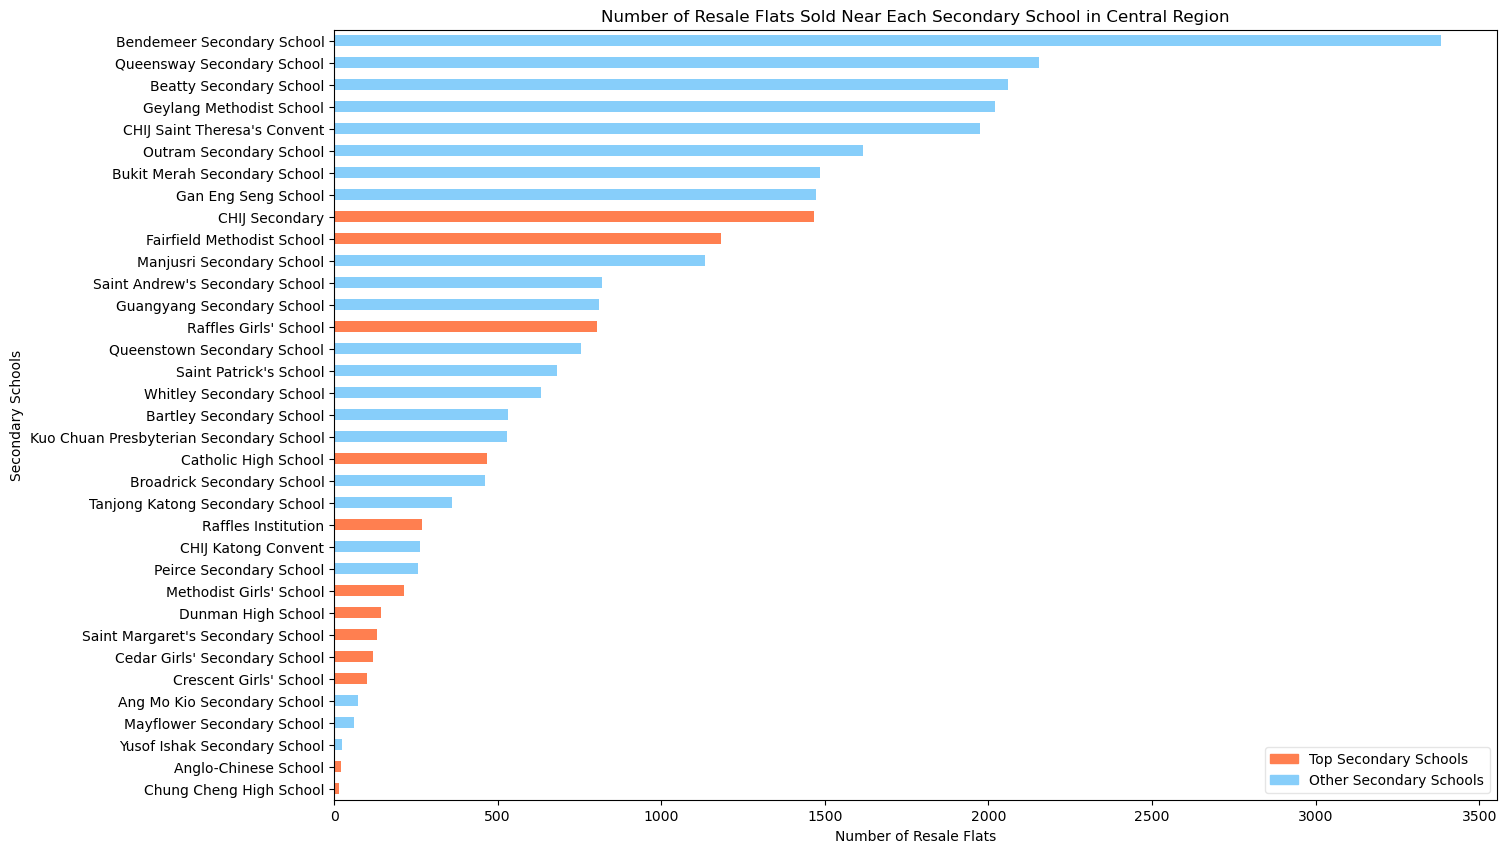

In [32]:
temp_df3 = train_df.drop(train_df.index[train_df['central'] == 0])

# list of top sec schs in central region
top_sec_schools_central = ["Raffles Girls' School", "Methodist Girls' School", "Raffles Institution", "Anglo-Chinese School", "Dunman High School",
"Cedar Girls' Secondary School", "Catholic High School", "CHIJ Secondary", "Chung Cheng High School", "Crescent Girls' School",
"Saint Margaret's Secondary School", "Fairfield Methodist School"]

# list of sec schs for colour customisation of bar plot
sec_sch_by_resale_vol_central = ['Chung Cheng High School', 'Anglo-Chinese School', 'Yusof Ishak Secondary School', 'Mayflower Secondary School', 'Ang Mo Kio Secondary School',
                                 "Crescent Girls' School", "Cedar Girls' Secondary School", "Saint Margaret's Secondary School", 'Dunman High School', "Methodist Girls' School",
                                 'Peirce Secondary School', 'CHIJ Katong Convent', 'Raffles Institution', 'Tanjong Katong Secondary School', 'Broadrick Secondary School',
                                 'Catholic High School', 'Kuo Chuan Presbyterian Secondary School', 'Bartley Secondary School', 'Whitley Secondary School', "Saint Patrick's School",
                                 'Queenstown Secondary School', "Raffles Girls' School", 'Guangyang Secondary School', "Saint Andrew's Secondary School", 'Manjusri Secondary School',
                                 'Fairfield Methodist School', 'CHIJ Secondary', 'Gan Eng Seng School', 'Bukit Merah Secondary School', 'Outram Secondary School', "CHIJ Saint Theresa's Convent",
                                 'Geylang Methodist School', 'Beatty Secondary School', 'Queensway Secondary School', 'Bendemeer Secondary School']

# custom colours for top schs vs. other schs
colors_3 = ["coral" if i in top_sec_schools_central else "lightskyblue" for i in sec_sch_by_resale_vol_central]

# bar plot sorted in descending order
ax7 = temp_df3.groupby('sec_sch_name')['id'].count().sort_values(ascending=True).plot(kind='barh',figsize=(15,10), color=colors_3)
plt.title('Number of Resale Flats Sold Near Each Secondary School in Central Region')
ax7.set_xlabel("Number of Resale Flats")
ax7.set_ylabel("Secondary Schools")

# create a custom legend
cr_patch = mpatches.Patch(color='coral', label='Top Secondary Schools')
ncr_patch = mpatches.Patch(color='lightskyblue', label='Other Secondary Schools')
plt.legend(handles=[cr_patch, ncr_patch], loc='lower right', framealpha=0.5, frameon=True)

In [33]:
# generate list of towns for colour customisation of bar plot
temp_df4 = train_df.groupby('planning_area')['resale_price'].mean().sort_values(ascending=True)
temp_df4.to_dict().keys()

dict_keys(['Changi', 'Yishun', 'Bukit Batok', 'Woodlands', 'Jurong West', 'Sembawang', 'Choa Chu Kang', 'Ang Mo Kio', 'Bedok', 'Jurong East', 'Geylang', 'Western Water Catchment', 'Bukit Panjang', 'Hougang', 'Novena', 'Sengkang', 'Rochor', 'Clementi', 'Punggol', 'Tampines', 'Toa Payoh', 'Serangoon', 'Pasir Ris', 'Kallang', 'Marine Parade', 'Queenstown', 'Bukit Merah', 'Bishan', 'Downtown Core', 'Outram', 'Bukit Timah', 'Tanglin'])

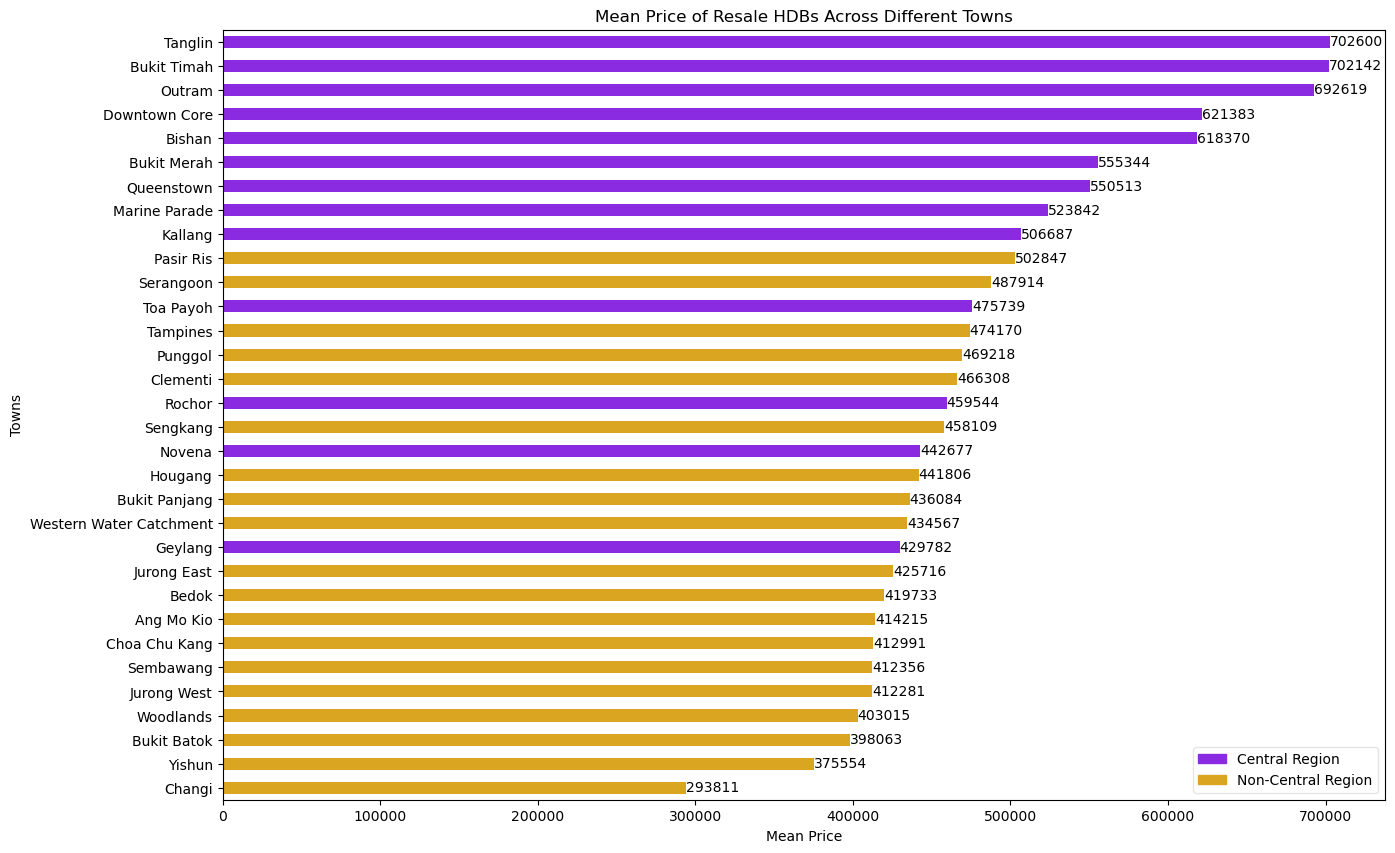

In [34]:
# list of towns for colour customisation of bar plot
planning_areas_by_price_ascending = ['Changi', 'Yishun', 'Bukit Batok', 'Woodlands', 'Jurong West', 'Sembawang', 'Choa Chu Kang', 'Ang Mo Kio', 'Bedok',
                                     'Jurong East', 'Geylang', 'Western Water Catchment', 'Bukit Panjang', 'Hougang', 'Novena', 'Sengkang', 'Rochor', 'Clementi',
                                     'Punggol', 'Tampines', 'Toa Payoh', 'Serangoon', 'Pasir Ris', 'Kallang', 'Marine Parade', 'Queenstown', 'Bukit Merah', 'Bishan',
                                     'Downtown Core', 'Outram', 'Bukit Timah', 'Tanglin'
                                     ]

# custom colours for central vs. non-central
colors_4 = ["blueviolet" if i in cr else "goldenrod" for i in planning_areas_by_price_ascending]

# bar plot sorted in descending order
ax8 = train_df.groupby('planning_area')['resale_price'].mean().sort_values(ascending=True).plot(kind='barh',figsize=(15, 10), color=colors_4)
plt.title('Mean Price of Resale HDBs Across Different Towns')
ax8.set_xlabel("Mean Price")
ax8.set_ylabel("Towns")
ax8.bar_label(ax8.containers[0])

# create a custom legend
cr_patch = mpatches.Patch(color='blueviolet', label='Central Region')
ncr_patch = mpatches.Patch(color='goldenrod', label='Non-Central Region')
plt.legend(handles=[cr_patch, ncr_patch], loc='lower right', framealpha=0.5, frameon=True)

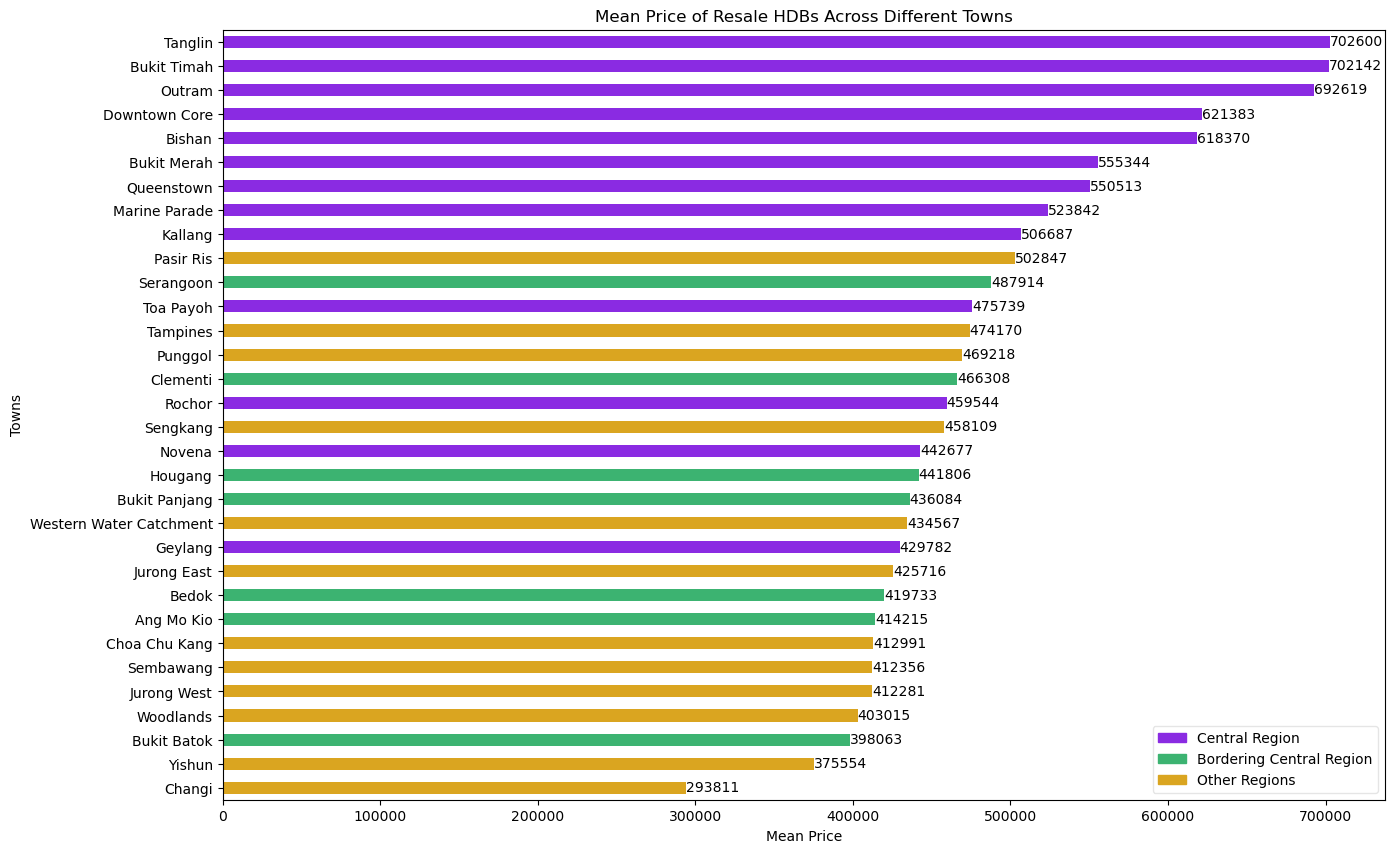

In [35]:
# generate custom list of colours for three-colour customisation of bar plot
colors_5 = []

for i in planning_areas_by_price_ascending:
    if i in bcr:
        colors_5.append("mediumseagreen")
    elif i in cr:
        colors_5.append("blueviolet")
    else:
        colors_5.append("goldenrod")

# bar plot sorted in descending order
ax8 = train_df.groupby('planning_area')['resale_price'].mean().sort_values(ascending=True).plot(kind='barh',figsize=(15, 10), color=colors_5)
plt.title('Mean Price of Resale HDBs Across Different Towns')
ax8.set_xlabel("Mean Price")
ax8.set_ylabel("Towns")
ax8.bar_label(ax8.containers[0])

# create a custom legend
cr_patch = mpatches.Patch(color='blueviolet', label='Central Region')
bcr_patch = mpatches.Patch(color='mediumseagreen', label='Bordering Central Region')
ncr_patch = mpatches.Patch(color='goldenrod', label='Other Regions')
plt.legend(handles=[cr_patch, bcr_patch, ncr_patch], loc='lower right', framealpha=0.5, frameon=True)